# Import the libraries

In [2]:
import numpy as np 
import pandas as pd 
import yfinance as yf
# Used to grab the stock prices, with yahoo 
import pandas_datareader.data as pdr
from datetime import datetime 
# To visualize the results 
import matplotlib.pyplot as plt 
import seaborn

# Select the list of tickers and select the daterange

In [3]:
yf.pdr_override()
start = datetime(2017, 1, 1)
symbols_list = ['AAPL', 'AMZN', 'GOOGL', 'GE', 'TSLA', 'IBM', 'PYPL']
#array to store prices
symbols=[]

# Pull stock prices, push into clean dataframe

In [4]:
#array to store prices
symbols=[]
for ticker in symbols_list:    
    r = pdr.get_data_yahoo(ticker, start)   
    # add a symbol column   
    r['Symbol'] = ticker    
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()
df_pivot=df.pivot(index='Date',columns='Symbol',values='Close').reset_index()
df_pivot.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Symbol,Date,AAPL,AMZN,GE,GOOGL,IBM,PYPL,TSLA
0,2017-01-03,29.037500,37.683498,190.296036,40.400501,159.837479,40.250000,14.466000
1,2017-01-04,29.004999,37.859001,190.356094,40.388500,161.816437,41.000000,15.132667
2,2017-01-05,29.152500,39.022499,189.275208,40.651001,161.281067,41.060001,15.116667
3,2017-01-06,29.477501,39.799500,189.815643,41.260502,162.074570,41.450001,15.267333
4,2017-01-09,29.747499,39.846001,188.914917,41.359001,160.277252,41.400002,15.418667


# Now, we can run the correlation. Using the Pandas ‘corr’ function to compute the Pearson correlation coeffecient between each pair of equities

In [5]:
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

Symbol,Date,AAPL,AMZN,GE,GOOGL,IBM,PYPL,TSLA
Symbol,,,,,,,,
Date,1.000000,0.951825,0.702759,-0.350338,0.871979,-0.257605,0.227746,0.829534
AAPL,0.951825,1.000000,0.766636,-0.195856,0.944324,-0.175647,0.307299,0.933929
AMZN,0.702759,0.766636,1.000000,-0.486013,0.812475,-0.458584,0.769876,0.791522
GE,-0.350338,-0.195856,-0.486013,1.000000,-0.176654,0.723304,-0.392923,-0.161434
GOOGL,0.871979,0.944324,0.812475,-0.176654,1.000000,-0.138587,0.428279,0.941030
IBM,-0.257605,-0.175647,-0.458584,0.723304,-0.138587,1.000000,-0.442065,-0.188553
PYPL,0.227746,0.307299,0.769876,-0.392923,0.428279,-0.442065,1.000000,0.425008
TSLA,0.829534,0.933929,0.791522,-0.161434,0.941030,-0.188553,0.425008,1.000000


# Finally, we can plot a heatmap of the correlations (with Seaborn and Matplotlib) to better visualize the results

<Figure size 640x480 with 0 Axes>

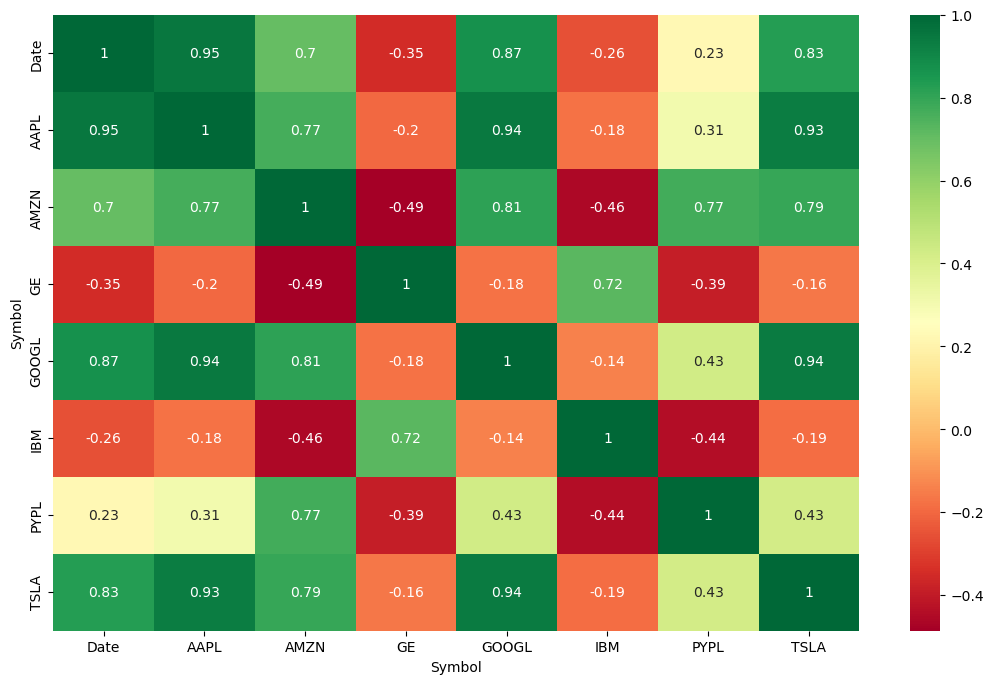

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(13, 8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()